# Análise das questões levantadas para as disciplinas do P5

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import os
import sys
sys.path.append(os.path.abspath("util.py"))

import util
import util_extrator_padroes
import util_gerador_graficos 

#### Abrindo Arquivos CSV

In [3]:
discentes = util.retorna_discentes()

disciplinas = util.retorna_componentes_com_semestre()

matriculas_realizadas = util.retorna_matriculas()

matriculas_geral = util.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = util.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 5

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      8
nome        8
ch_total    8
semestre    8
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1107109', '1107165', '1107177', '1107180', '1107184']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
### Tratando disciplinas com mais de um registromatriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:

* LOGICA APLC A COMPUTACAO e LOGICA APLICADA A COMPUTACAO

* CALCULO NUMERICO (sem nenhuma matricula) e CALCULO NUMERICO e CALCULO NUMERICO

* INTRODUCAO AO PROC DIGITAL DE IMAGENS e INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS

* ARQUITETURA DE COMPUTADORES II e ARQUITETURA DE COMPUTADORES II

* ADM SIST DE INFORMACOES e ADMINISTRACAO DE SISTEMAS DE INFORMACAO

* CONSTRUCAO DE COMPILADORES I e CONSTRUÇÃO DE COMPILADORES I

* REDES DE COMPUTADORES I e REDES DE COMPUTADORES I

* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

* FISICA APLICADA A COMPUTACAO I (de 60 creditos e de 90 creditos)

* FISICA APLICADA A COMPUTACAO II (de 60 creditos e de 90 creditos)

* CALCULO I (de 60 creditos e de 90 creditos)

* CALCULO II (de 60 creditos e de 90 creditos)

* CALCULO III (de 60 creditos e de 90 creditos)

* CIRCUITOS (de 60 creditos e de 90 creditos)

* INTRODUCAO A ALGEBRA LINEAR e ALGEBRA LIN GEO ANALITICA 

In [21]:
'''fisica1 = []
fisica1 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO I']['codigo'].to_list()
print(fisica1)

calc1 = []
calc1 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['codigo'].to_list()
print(calc1)'''

'''fisica2 = []
fisica2 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO II']['codigo'].to_list()
print(fisica2)

calc2 = []
calc2 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL II']['codigo'].to_list()
print(calc2)

algebra = []
algebra.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO A ALGEBRA LINEAR']['codigo'].iloc[0])
algebra.append(disciplinas[disciplinas['nome'] == 'ALGEBRA LIN GEO ANALITICA']['codigo'].iloc[0])
print(algebra)

logica = []
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLC A COMPUTACAO']['codigo'].iloc[0])
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLICADA A COMPUTACAO']['codigo'].iloc[0])
print(logica)'''

'''calc3 = []
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIF  E INTEGRAL III']['codigo'].iloc[0])
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL III']['codigo'].iloc[0])
print(calc3)

cl = []
cl = disciplinas[disciplinas['nome'] == 'CIRCUITOS LOGICOS']['codigo'].to_list()
print(cl)'''

'''numerico = []
numerico = disciplinas[disciplinas['nome'] == 'CALCULO NUMERICO']['codigo'].to_list()
print(numerico)

pdi = []
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO AO PROC DIGITAL DE IMAGENS']['codigo'].iloc[0])
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS']['codigo'].iloc[0])
print(pdi)'''

arq2 = []
arq2 = disciplinas[disciplinas['nome'] == 'ARQUITETURA DE COMPUTADORES II']['codigo'].to_list()
print(arq2)

'''redes = []
redes = disciplinas[disciplinas['nome'] == 'REDES DE COMPUTADORES I']['codigo'].to_list()
print(redes)

admsi = []
admsi.append(disciplinas[disciplinas['nome'] == 'ADM SIST DE INFORMACOES']['codigo'].iloc[0])
admsi.append(disciplinas[disciplinas['nome'] == 'ADMINISTRACAO DE SISTEMAS DE INFORMACAO']['codigo'].iloc[0])
print(admsi)

comp = []
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUCAO DE COMPILADORES I']['codigo'].iloc[0])
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUÇÃO DE COMPILADORES I']['codigo'].iloc[0])
print(comp)'''

'''estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)'''

['1107109', 'GDSCO0037']


"estagio = []\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])\nprint(estagio)"

In [22]:
'''fisica1, matriculas_realizadas = util.mapeia_disciplina(fisica1.copy(), matriculas_realizadas)
calc1, matriculas_realizadas = util.mapeia_disciplina(calc1.copy(), matriculas_realizadas)'''

'''fisica2, matriculas_realizadas = util.mapeia_disciplina(fisica2.copy(), matriculas_realizadas)
calc2, matriculas_realizadas = util.mapeia_disciplina(calc2.copy(), matriculas_realizadas)
algebra, matriculas_realizadas = util.mapeia_disciplina(algebra.copy(), matriculas_realizadas)
logica, matriculas_realizadas = util.mapeia_disciplina(logica.copy(), matriculas_realizadas)'''

'''calc3, matriculas_realizadas = util.mapeia_disciplina(calc3.copy(), matriculas_realizadas)
cl, matriculas_realizadas = util.mapeia_disciplina(cl.copy(), matriculas_realizadas)'''

'''numerico, matriculas_realizadas = util.mapeia_disciplina(numerico.copy(), matriculas_realizadas)
pdi, matriculas_realizadas = util.mapeia_disciplina(pdi.copy(), matriculas_realizadas)'''

arq2_aux, matriculas_realizadas = util.mapeia_disciplina(arq2.copy(), matriculas_realizadas)
arq2_aux, matriculas_geral = util.mapeia_disciplina(arq2.copy(), matriculas_geral)

'''redes, matriculas_realizadas = util.mapeia_disciplina(redes.copy(), matriculas_realizadas)
admsi, matriculas_realizadas = util.mapeia_disciplina(admsi.copy(), matriculas_realizadas)
comp, matriculas_realizadas = util.mapeia_disciplina(comp.copy(), matriculas_realizadas)'''

'''estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'''

Disciplina(s) ['GDSCO0037'] mapeadas para o código 1107109
Disciplina(s) ['GDSCO0037'] mapeadas para o código 1107109


'estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'

### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])
    
codigos_disciplinas.remove('GDSCO0037')

1107109
ARQUITETURA DE COMPUTADORES II
1107165
SISTEMAS OPERACIONAIS I
1107177
ANALISE E PROJETO DE ALGORITMOS
1107180
BANCO DE DADOS I
1107184
ESPECIFICACAO DE REQUISITOS DE SOFTWARE
1107205
PARADIGMAS DE LING DE PROGRAMAÇÃO
1204115
ADM DE EMPRESAS
GDSCO0037
ARQUITETURA DE COMPUTADORES II


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1107109
ARQUITETURA DE COMPUTADORES II
1107165
SISTEMAS OPERACIONAIS I
1107177
ANALISE E PROJETO DE ALGORITMOS
1107180
BANCO DE DADOS I
1107184
ESPECIFICACAO DE REQUISITOS DE SOFTWARE
1107205
PARADIGMAS DE LING DE PROGRAMAÇÃO
1204115
ADM DE EMPRESAS


### Gerando relatório

In [25]:
relatorio = []

for codigo in codigos_disciplinas:
    
    relatorio_disciplina = {'nome': None, 'rec': None, 'nao_rec': None, 'alunos_nao_rec': []}

    aux = matriculas_realizadas[matriculas_realizadas['codigo_componente'] == codigo]

    disciplina = disciplinas[disciplinas['codigo'] == codigo]['nome'].iloc[0]

    #periodo_recomendado = int(disciplinas[disciplinas['codigo'] == codigo]['semestre'].iloc[0])

    relatorio_disciplina['nome'] = disciplina

    matriculas = aux.count().iloc[0]
        
    #matriculas = 1

    rec = 0
    nao_rec = 0
    
    alunos_nao_rec = []

    for row in aux.iterrows():

        #print(row[1])
        #print()

        aluno = row[1]['matricula']

        if aluno not in matriculas_discentes:
            matriculas -= 1
            continue

        else:
                
            periodo_matricula = row[1]['periodo_matricula']
            periodo_ingresso = discentes_depois[discentes_depois['matricula'] == aluno]['periodo_ingresso'].iloc[0]

            periodo_cursou = util.retorna_tempo_graduacao(periodo_ingresso, periodo_matricula)

            #print('rec: {} matri: {} ingre: {} cursou: {}'.format(periodo_recomendado, periodo_matricula, periodo_ingresso, periodo_cursou))

            if periodo_cursou == periodo_rec:
                rec += 1

            else:
                nao_rec += 1
                alunos_nao_rec.append(aluno)
                    
            #matriculas += 1

    
    relatorio_disciplina['rec'] = rec/matriculas
    relatorio_disciplina['nao_rec'] = nao_rec/matriculas
    relatorio_disciplina['alunos_nao_rec'] = alunos_nao_rec
    print(matriculas)
    
    relatorio.append(relatorio_disciplina)

217
218
217
217
217
217
217


In [26]:
relatorio

[{'nome': 'ARQUITETURA DE COMPUTADORES II',
  'rec': 0.4700460829493088,
  'nao_rec': 0.5299539170506913,
  'alunos_nao_rec': [10611015,
   10621020,
   10621022,
   10711005,
   10711011,
   10711018,
   10711021,
   10711027,
   10711029,
   10711032,
   10711466,
   10711469,
   10721006,
   10721015,
   10721026,
   10721244,
   10811031,
   10811041,
   10811057,
   10811434,
   10811443,
   10821055,
   10821060,
   10821063,
   10821251,
   10821361,
   10911036,
   10911040,
   10911042,
   10911044,
   10911054,
   10911068,
   10911075,
   10911649,
   10911653,
   10921054,
   10921059,
   10921063,
   10921064,
   10921069,
   10921071,
   10921072,
   10921073,
   10921360,
   10921363,
   10921372,
   10921373,
   10921379,
   11011053,
   11011057,
   11011062,
   11011065,
   11011073,
   11011091,
   11011827,
   11011828,
   11011829,
   11011830,
   11011833,
   11021057,
   11021067,
   11021068,
   11021452,
   11021593,
   11021633,
   11021645,
   11111298,
   11

### Analisando ARQUITETURA II

In [27]:
codigo = codigos_disciplinas[0]

In [28]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

ARQUITETURA DE COMPUTADORES II


[10611015,
 10621020,
 10621022,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821055,
 10821060,
 10821063,
 10821251,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921379,
 11011053,
 11011057,
 11011062,
 11011065,
 11011073,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11021057,
 11021067,
 11021068,
 11021452,
 11021593,
 11021633,
 11021645,
 11111298,
 11111316,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118209,
 11121212,
 11121216,
 11121217,
 11121220,
 11121911,
 11121912,
 11128089,
 11211414,
 11211425,
 11218354,
 11218562,
 11218638,
 11218640,
 11218649,
 11218797,
 11221998,

In [29]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11193   10611015             2009.1           1107109  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12156   10621020             2009.2           1107109  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
504   10621022  7.45            2006.2  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
12225   10621022             2009.2           1107109  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
518   10711005  9.16            2007.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
555   10911054  7.82            2009.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15047   10911054             2011.2           1107109  APROVADO          9.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
558   10911068  7.9            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15106   10911068             2011.2           1107109  APROVADO          7.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
562   10911075  8.7            2009.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15161   10911075             2011.2           1107109  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
561   10911649  7.18            2009.1  CONCLUÍDO       

       matricula  periodo_matricula codigo_componente descricao  media_final
17586   11021067             2013.1           1107109  APROVADO          9.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
607   11021068  5.6            2010.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17654   11021068             2013.1           1107109  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
600   11021452  8.38            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18011   11021452             2013.1           1107109  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
606   11021593  4.94            2010.2  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18066   11021593             2013.2           

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
656   11218797  6.82            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21498   11218797             2014.2           1107109  APROVADO          9.0

     matricula  cra  periodo_ingresso         descricao  periodo_conclusao
666   11221998  5.1            2012.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21871   11221998             2017.2           1107109  APROVADO          5.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
669   11228204  5.73            2012.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21890   11228204             2012.2           1107109  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
667   11228207  6.58            2012.2  

In [30]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [31]:
aux

[0.14782608695652175,
 0.017391304347826087,
 0.02608695652173913,
 0.008695652173913044,
 0.0,
 0.5043478260869565,
 0.17391304347826086,
 0.043478260869565216,
 0.02608695652173913,
 0.008695652173913044,
 0.034782608695652174,
 0.008695652173913044]

In [32]:
sum(aux)

0.9999999999999998

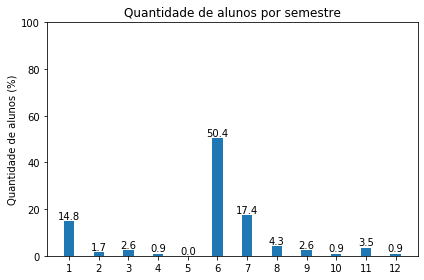

In [33]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [34]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [35]:
aux

{'APROVADO': 0.808695652173913,
 'REPROVADO': 0.017391304347826087,
 'EXCLUIDA': 0.008695652173913044,
 'TRANCADO': 0.008695652173913044,
 'DISPENSADO': 0.14782608695652175,
 'MATRICULADO': 0.008695652173913044}

### Analisando SO

In [36]:
codigo = codigos_disciplinas[1]

In [37]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

SISTEMAS OPERACIONAIS I


[10611440,
 10621017,
 10621020,
 10621239,
 10621243,
 10621363,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711469,
 10721015,
 10721022,
 10721244,
 10821055,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911646,
 10911649,
 10921059,
 10921063,
 10921069,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011050,
 11011057,
 11011060,
 11011061,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011830,
 11011833,
 11011835,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021432,
 11021445,
 11021452,
 11021593,
 11021633,
 11021645,
 11111298,
 11111309,
 11111316,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121219,
 11121220,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211414,
 11218354,
 11218562,
 11218638,
 11218640,
 11218649,

In [38]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11827   10611440             2009.2           1107165  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12050   10621017             2009.1           1107165  APROVADO         6.83

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12151   10621020             2009.1           1107165  APROVADO         8.17

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
514   10621239  7.38            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
573   10921069  7.87            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15677   10921069             2012.2           1107165  APROVADO          5.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
568   10921072  6.82            2009.2  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15780   10921072             2012.2           1107165  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
565   10921360  6.23            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15895   10921360             2012.2           1107165  APROVADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
570   10921363  6.23            2009.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
612   11021633  7.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18155   11021633             2013.1           1107165  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18258   11021645             2010.2           1107165  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
621   11111298  6.65            2011.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18378   11111298             2014.2           1107165  APROVADO         8.28

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
617   11111309  8.62            2011.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
20553   11211410             2014.2           1107165  APROVADO         7.88

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
648   11211414  7.65            2012.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20654   11211414             2015.2           1107165  APROVADO          8.4

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
646   11218354  8.02            2012.1  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21005   11218354             2017.2           1107165  APROVADO          8.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
657   11218562  7.28            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21054   11218562             2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
19657   11121218             2011.2           1107165  DISPENSADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20507   11211054             2012.1           1107165  DISPENSADO          5.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
663   11211413  8.09            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20582   11211413             2012.1           1107165  DISPENSADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
655   11218275  5.32            2012.1  

In [39]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [40]:
aux

[0.11811023622047244,
 0.031496062992125984,
 0.031496062992125984,
 0.031496062992125984,
 0.0,
 0.31496062992125984,
 0.23622047244094488,
 0.11023622047244094,
 0.07874015748031496,
 0.031496062992125984,
 0.007874015748031496,
 0.007874015748031496]

In [41]:
sum(aux)

1.0

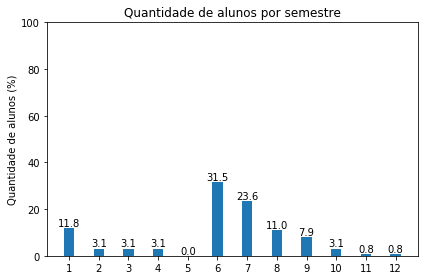

In [42]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [43]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [44]:
aux

{'APROVADO': 0.7952755905511811,
 'TRANCADO': 0.023622047244094488,
 'REPROVADO': 0.047244094488188976,
 'EXCLUIDA': 0.007874015748031496,
 'DISPENSADO': 0.12598425196850394}

### Analisando APA

In [45]:
codigo = codigos_disciplinas[2]

In [46]:
print(relatorio[2]['nome'])

alunos_nao_rec = relatorio[2]['alunos_nao_rec']

alunos_nao_rec

ANALISE E PROJETO DE ALGORITMOS


[10611015,
 10611021,
 10611026,
 10611028,
 10611029,
 10611434,
 10611437,
 10611440,
 10621012,
 10621014,
 10621015,
 10621017,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711001,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811060,
 10811434,
 10811437,
 10811438,
 10811443,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921378,
 10921379,
 11011050,
 11011057,
 11011060,
 11011061,
 11011065,
 11011068,
 11011073,
 11011087,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011835,

In [47]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11194   10611015             2009.1           1107177  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
490   10611021  8.37            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11315   10611021             2009.2           1107177  APROVADO          8.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
499   10611026  8.43            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11470   10611026             2009.2           1107177  APROVADO          9.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
491   10611028  8.57            2006.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
13476   10711466             2009.2           1107177  APROVADO          6.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
525   10711467  8.37            2007.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13535   10711467             2008.2           1107177  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
521   10711469  6.36            2007.1  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
13607   10711469             2010.2           1107177  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
537   10721006  6.07            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
13688   10721006             2010.1       

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
559   10911646  7.64            2009.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15221   10911646             2010.1           1107177  APROVADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
561   10911649  7.18            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15271   10911649             2011.2           1107177  TRANCADO          NaN
15275   10911649             2012.1           1107177  APROVADO          9.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
563   10911653  6.68            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15332   10911653             2012.1           1107177  APROVADO          9.3

     matricula   cra  periodo_ingresso  desc

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
594   11011829  7.65            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17034   11011829             2013.2           1107177  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
588   11011830  8.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17084   11011830             2013.1           1107177  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
584   11011835  7.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17190   11011835             2012.2           1107177  APROVADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
585   11011836  7.35            2010.1  CONCLUÍDO   

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
622   11118209  6.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19339   11118209             2015.1           1107177  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
642   11121191  5.98            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
19391   11121191             2015.1           1107177  REPROVADO          0.0
19409   11121191             2016.1           1107177  REPROVADO          4.3
19416   11121191             2016.2           1107177   APROVADO          5.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
635   11121216  6.48            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19528   11121216             2014.2        

       matricula  periodo_matricula codigo_componente descricao  media_final
21397   11218650             2014.2           1107177  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
652   11218788  8.85            2012.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21450   11218788             2014.2           1107177  APROVADO          8.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
656   11218797  6.82            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21529   11218797             2017.2           1107177  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
650   11218799  7.33            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21574   11218799             2014.2         

       matricula  periodo_matricula codigo_componente descricao  media_final
23858   11511184             2016.1           1107177  APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
696   11512971  7.98            2015.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23906   11512971             2016.1           1107177  APROVADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
500   10611004  8.57            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
10943   10611004             2008.2           1107177  DISPENSADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
484   10611008  8.82            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
10995   10611008             2008.2   

In [48]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [49]:
aux

[0.03804347826086957,
 0.021739130434782608,
 0.043478260869565216,
 0.016304347826086956,
 0.0,
 0.125,
 0.20108695652173914,
 0.25,
 0.11413043478260869,
 0.08695652173913043,
 0.07065217391304347,
 0.02717391304347826,
 0.005434782608695652]

In [50]:
sum(aux)

0.9999999999999999

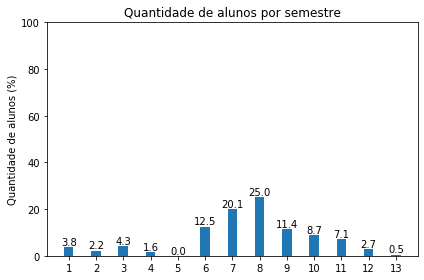

In [51]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [52]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [53]:
aux

{'APROVADO': 0.7010869565217391,
 'REPROVADO': 0.07608695652173914,
 'TRANCADO': 0.11413043478260869,
 'REP. FALTA': 0.021739130434782608,
 'EXCLUIDA': 0.02717391304347826,
 'DISPENSADO': 0.059782608695652176}

### Analisando BD

In [54]:
codigo = codigos_disciplinas[3]

In [55]:
print(relatorio[3]['nome'])

alunos_nao_rec = relatorio[3]['alunos_nao_rec']

alunos_nao_rec

BANCO DE DADOS I


[10611440,
 10621014,
 10621015,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621367,
 10711001,
 10711005,
 10711010,
 10711011,
 10711012,
 10711013,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721022,
 10721244,
 10811041,
 10811057,
 10811060,
 10811434,
 10811437,
 10811443,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921372,
 10921373,
 10921378,
 10921379,
 11011057,
 11011060,
 11011061,
 11011065,
 11011068,
 11011073,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011835,
 11011836,
 11021057,
 11021059,
 11021067,
 11021068,
 11021072,
 11021439,
 11021445,
 11021593,
 11021633,
 11021635,
 11021645,
 11111298,
 11111303,
 11111309,

In [56]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11821   10611440             2009.2           1107180  APROVADO          6.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
505   10621014  7.83            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11938   10621014             2009.1           1107180  APROVADO          7.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
12005   10621015             2010.2           1107180  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
533   10721244  7.27            2007.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13905   10721244             2010.2           1107180  APROVADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
539   10811041  8.66            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14063   10811041             2010.2           1107180  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
538   10811057  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14116   10811057             2010.2           1107180  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
545   10811060  8.56            2008.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
15912   10921360             2013.2           1107180  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
576   10921372  8.01            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16035   10921372             2014.1           1107180  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
571   10921373  8.89            2009.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16082   10921373             2012.1           1107180  APROVADO          9.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
577   10921378  6.73            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16152   10921378             2013.2         

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18273   11021645             2011.2           1107180  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
621   11111298  6.65            2011.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18368   11111298             2013.2           1107180  APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
629   11111303  8.55            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18486   11111303             2013.2           1107180  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
617   11111309  8.62            2011.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
21207   11218640             2016.1           1107180  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
658   11218649  6.26            2012.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21337   11218649             2015.2           1107180  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
656   11218797  6.82            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21501   11218797             2014.2           1107180  APROVADO          8.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
650   11218799  7.33            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21571   11218799             2014.2         

       matricula  periodo_matricula codigo_componente   descricao  media_final
17547   11021063             2015.2           1107180  DISPENSADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
600   11021452  8.38            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18017   11021452             2015.1           1107180  DISPENSADO          6.4

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18450   11111299             2011.2           1107180  DISPENSADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20499   11211054             201

In [57]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [58]:
aux

[0.06329113924050633,
 0.0379746835443038,
 0.02531645569620253,
 0.03164556962025317,
 0.0,
 0.3987341772151899,
 0.2088607594936709,
 0.10759493670886076,
 0.0759493670886076,
 0.03164556962025317,
 0.012658227848101266,
 0.006329113924050633]

In [59]:
sum(aux)

1.0

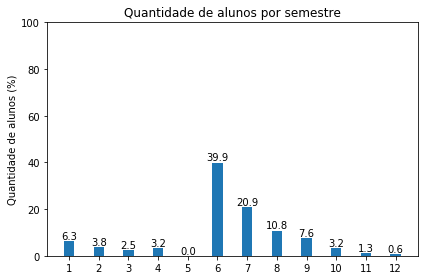

In [60]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [61]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [62]:
aux

{'APROVADO': 0.8164556962025317,
 'REPROVADO': 0.05063291139240506,
 'TRANCADO': 0.012658227848101266,
 'EXCLUIDA': 0.02531645569620253,
 'DISPENSADO': 0.0949367088607595}

### Analisando REQUISITOS

In [63]:
codigo = codigos_disciplinas[4]

In [64]:
print(relatorio[4]['nome'])

alunos_nao_rec = relatorio[4]['alunos_nao_rec']

alunos_nao_rec

ESPECIFICACAO DE REQUISITOS DE SOFTWARE


[10611015,
 10611440,
 10621015,
 10621020,
 10621363,
 10621364,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721244,
 10811041,
 10811057,
 10811434,
 10811443,
 10821060,
 10821063,
 10911036,
 10911040,
 10911044,
 10911054,
 10911075,
 10911646,
 10921372,
 11011050,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11021057,
 11021067,
 11021068,
 11021645,
 11111298,
 11111303,
 11111309,
 11111314,
 11111316,
 11111321,
 11111322,
 11118146,
 11118202,
 11118203,
 11118204,
 11118207,
 11118209,
 11121191,
 11121216,
 11121911,
 11128089,
 11211414,
 11218354,
 11218562,
 11218638,
 11218640,
 11218649,
 11218797,
 11218799,
 11221998,
 11228204,
 11228207,
 11311007,
 11311009,
 11311014,
 11311018,
 11311862,
 11318705,
 11318739,
 11512971,
 11514334,
 10721026,

In [65]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11191   10611015             2008.2           1107184  APROVADO          6.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
11802   10611440             2008.1           1107184  REPROVADO          0.8
11808   10611440             2008.2           1107184   TRANCADO          NaN
11812   10611440             2009.1           1107184   APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11987   10621015             2009.1      

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
593   11011050  9.19            2010.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16242   11011050             2011.2           1107184  APROVADO          9.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
579   11011053  8.67            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16305   11011053             2012.2           1107184  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
582   11011057  8.42            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16342   11011057             2011.2           1107184  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
592   11011060  7.09            2010.1  CONCLUÍDO   

624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18885   11118146             2015.2           1107184  APROVADO          9.4

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
627   11118202  7.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19056   11118202             2015.1           1107184  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
620   11118203  7.95            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19113   11118203             2015.1           1107184  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
618   11118204  4.76            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente d

       matricula  periodo_matricula codigo_componente   descricao  media_final
16727   11011087             2011.1           1107184  DISPENSADO          8.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18416   11111299             2011.1           1107184  DISPENSADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
19677   11121218             2011.2           1107184  DISPENSADO          6.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20486   11211054             201

In [66]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [67]:
aux

[0.19090909090909092,
 0.00909090909090909,
 0.05454545454545454,
 0.12727272727272726,
 0.0,
 0.38181818181818183,
 0.10909090909090909,
 0.06363636363636363,
 0.05454545454545454,
 0.00909090909090909]

In [68]:
sum(aux)

1.0

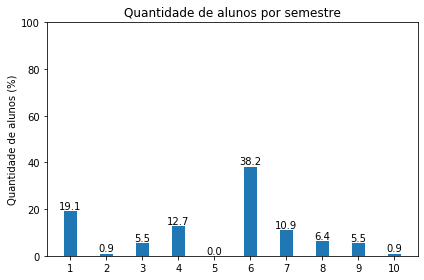

In [69]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [70]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [71]:
aux

{'APROVADO': 0.7363636363636363,
 'REPROVADO': 0.02727272727272727,
 'TRANCADO': 0.03636363636363636,
 'EXCLUIDA': 0.02727272727272727,
 'DISPENSADO': 0.17272727272727273}

### Analisando PARADIGMAS

In [72]:
codigo = codigos_disciplinas[5]

In [73]:
print(relatorio[5]['nome'])

alunos_nao_rec = relatorio[5]['alunos_nao_rec']

alunos_nao_rec

PARADIGMAS DE LING DE PROGRAMAÇÃO


[10611028,
 10611437,
 10611440,
 10621015,
 10621017,
 10621022,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10711005,
 10711012,
 10711018,
 10711021,
 10711027,
 10711032,
 10711466,
 10711467,
 10711469,
 10721015,
 10721022,
 10721026,
 10721244,
 10811031,
 10821057,
 10821063,
 10821251,
 10821361,
 10911054,
 10911649,
 10921063,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021060,
 11021067,
 11021068,
 11021072,
 11021439,
 11021445,
 11021633,
 11021635,
 11111285,
 11111298,
 11111303,
 11111309,
 11111314,
 11111322,
 11118146,
 11118202,
 11118204,
 11118207,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121218,
 11121220,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211414,
 11211416,
 11211422,
 11211425,

In [74]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
491   10611028  8.57            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11522   10611028             2009.2           1107205  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
498   10611437  8.55            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11718   10611437             2009.2           1107205  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
11829   10611440             2009.2           1107205  REP. FALTA          0.0
11832   10611440             2010.1           1107205   REPROVADO          2.7
11838   10611440             2010.2    

       matricula  periodo_matricula codigo_componente descricao  media_final
15571   10921063             2013.2           1107205  APROVADO          5.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
568   10921072  6.82            2009.2  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15782   10921072             2012.2           1107205  APROVADO          6.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
565   10921360  6.23            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
15891   10921360             2012.1           1107205  REPROVADO          4.6
15902   10921360             2013.1           1107205   APROVADO          7.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
570   10921363  6.23            2009.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codig

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
628   11111314  6.9            2011.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18607   11111314             2012.2           1107205  APROVADO          5.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
625   11111322  4.77            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18777   11111322             2012.1           1107205  APROVADO          6.7

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18879   11118146             2013.2           1107205  APROVADO          7.4

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
627   11118202  7.5            2011.1  CONCLUÍDO         

       matricula  periodo_matricula codigo_componente descricao  media_final
21056   11218562             2016.1           1107205  APROVADO          5.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
651   11218638  8.75            2012.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21128   11218638             2015.1           1107205  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
658   11218649  6.26            2012.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21336   11218649             2015.2           1107205  APROVADO          8.1

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
659   11218650  8.8            2012.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21407   11218650             2015.1           

       matricula  periodo_matricula codigo_componente   descricao  media_final
20862   11218275             2012.1           1107205  DISPENSADO          8.3

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
664   11221262  7.9            2012.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
21712   11221262             2012.2           1107205  DISPENSADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
672   11311014  7.57            2013.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
22174   11311014             2015.1           1107205    EXCLUIDA          NaN
22185   11311014             2016.1           1107205    EXCLUIDA          NaN
22192   11311014             2016.1           1107205  DISPENSADO          9.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
679   11321685  7.59  

In [75]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [76]:
aux

[0.1076923076923077,
 0.038461538461538464,
 0.038461538461538464,
 0.1,
 0.0,
 0.2153846153846154,
 0.2230769230769231,
 0.13076923076923078,
 0.06923076923076923,
 0.05384615384615385,
 0.015384615384615385,
 0.007692307692307693]

In [77]:
sum(aux)

1.0

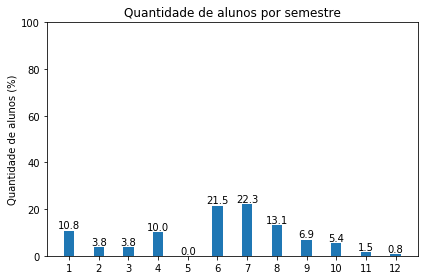

In [78]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [79]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [80]:
aux

{'APROVADO': 0.8153846153846154,
 'REP. FALTA': 0.015384615384615385,
 'REPROVADO': 0.038461538461538464,
 'TRANCADO': 0.015384615384615385,
 'EXCLUIDA': 0.015384615384615385,
 'DISPENSADO': 0.1}

In [81]:
sum(aux.values())

0.9999999999999999

### Analisando ADM

In [82]:
codigo = codigos_disciplinas[6]

In [83]:
print(relatorio[6]['nome'])

alunos_nao_rec = relatorio[6]['alunos_nao_rec']

alunos_nao_rec

ADM DE EMPRESAS


[10611440,
 10621015,
 10621017,
 10621018,
 10621020,
 10621022,
 10621030,
 10621239,
 10621363,
 10621364,
 10621367,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711028,
 10711032,
 10711466,
 10711467,
 10711469,
 10721015,
 10721022,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821063,
 10821251,
 10911036,
 10911040,
 10911042,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921069,
 10921072,
 10921073,
 10921360,
 10921372,
 10921378,
 11011050,
 11011057,
 11011061,
 11011065,
 11011827,
 11011828,
 11011829,
 11011830,
 11011836,
 11021057,
 11021059,
 11021067,
 11021068,
 11021445,
 11021452,
 11021593,
 11021633,
 11021645,
 11111298,
 11111309,
 11111314,
 11118146,
 11121191,
 11121212,
 11121216,
 11121219,
 11121223,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211414,
 11211422,
 11211425,
 11218354,
 11218562,
 11218640,
 11218646,
 11218650,
 11218797,
 11218799,
 11221240,
 11221998,
 11228207,

In [84]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11809   10611440             2008.2           1204115  APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11985   10621015             2009.1           1204115  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12049   10621017             2009.1           1204115  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
515   10621018  8.15            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
554   10911040  8.99            2009.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14889   10911040             2011.2           1204115  APROVADO          9.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
557   10911042  7.8            2009.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14931   10911042             2010.2           1204115  APROVADO         10.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
558   10911068  7.9            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15096   10911068             2010.2           1204115  APROVADO         10.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
562   10911075  8.7            2009.1  CONCLUÍDO         

       matricula  periodo_matricula codigo_componente descricao  media_final
18060   11021593             2013.1           1204115  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
612   11021633  7.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18138   11021633             2011.2           1204115  APROVADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18257   11021645             2010.2           1204115  APROVADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
621   11111298  6.65            2011.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18350   11111298             2012.1         

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
676   11311007  8.94            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22061   11311007             2015.2           1204115  APROVADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
675   11311009  7.94            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22125   11311009             2016.1           1204115  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
672   11311014  7.57            2013.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente    descricao  \
22201   11311014             2016.2           1204115  DESISTENCIA   
22209   11311014             2017.1           1204115     APROVADO   

       media_final  
22201          NaN  
22209          7.8  

 

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
679   11321685  7.59            2013.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
22617   11321685             2013.2           1204115  DISPENSADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
680   11328180  7.75            2013.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22679   11328180             2013.2           1204115  DISPENSADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
687   11403755  7.46            2014.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22994   11403755             2014.2           1204115  DISPENSADO          8.3

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
683   11403784  7.3            2014.1  CO

In [85]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [86]:
aux

[0.18604651162790697,
 0.06201550387596899,
 0.06976744186046512,
 0.17829457364341086,
 0.0,
 0.2868217054263566,
 0.13178294573643412,
 0.031007751937984496,
 0.03875968992248062,
 0.015503875968992248]

In [87]:
sum(aux)

1.0

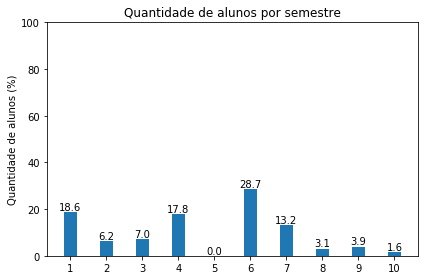

In [88]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [89]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [90]:
aux

{'APROVADO': 0.751937984496124,
 'TRANCADO': 0.03875968992248062,
 'DESISTENCIA': 0.007751937984496124,
 'DISPENSADO': 0.20155038759689922}

In [91]:
sum(aux.values())

1.0